In [ ]:
from compression import encode, decode

text = "The cat sat on the mat and the cat sat on the mat and the cat sat on the mat"
encoded_range = encode(text)
num = encoded_range[0] + (encoded_range[1] - encoded_range[0]) / 2

decoded = decode(num,len(text))

print(f"Original text: {text}")
print(f"Encoded text: {num}")
print(f"Decoded text: {decoded}")
print(f"Decoded text is equal to original text: {text == decoded}")


# analyse the compression rati


Position 0: 'T' -> Range: (0.6679687500, 0.6718750000)
Position 1: 'h' -> Range: (0.6687352888, 0.6687522319)
Position 2: 'e' -> Range: (0.6687408603, 0.6687412655)
Position 3: ' ' -> Range: (0.6687408944, 0.6687412655)
Position 4: 'c' -> Range: (0.6687412024, 0.6687412025)
Position 5: 'a' -> Range: (0.6687412025, 0.6687412025)
Position 6: 't' -> Range: (0.6687412025, 0.6687412025)
Position 7: ' ' -> Range: (0.6687412025, 0.6687412025)
Position 8: 's' -> Range: (0.6687412025, 0.6687412025)
Position 9: 'a' -> Range: (0.6687412025, 0.6687412025)
Position 10: 't' -> Range: (0.6687412025, 0.6687412025)
Position 11: ' ' -> Range: (0.6687412025, 0.6687412025)
Position 12: 'o' -> Range: (0.6687412025, 0.6687412025)
Position 13: 'n' -> Range: (0.6687412025, 0.6687412025)
Position 14: ' ' -> Range: (0.6687412025, 0.6687412025)
Position 15: 't' -> Range: (0.6687412025, 0.6687412025)
Position 16: 'h' -> Range: (0.6687412025, 0.6687412025)
Position 17: 'e' -> Range: (0.6687412025, 0.6687412025)
Po

In [2]:
import math

def calculate_compression_ratio(original_text, final_low, final_high):
    """
    Calculate compression ratio for arithmetic coding.

    Args:
        original_text: The input text that was encoded
        final_low: Lower bound of the final interval
        final_high: Upper bound of the final interval

    Returns:
        tuple: (compression_ratio, original_bits, compressed_bits)
    """
    # Original size in bits (assuming 8 bits per character)
    original_bits = len(original_text) * 8

    # Width of the final interval
    interval_width = final_high - final_low

    # Bits needed to represent a number in this interval
    # We add 1 to ensure we have enough precision
    compressed_bits = math.ceil(-math.log2(interval_width)) + 1

    # Compression ratio
    compression_ratio = original_bits / compressed_bits

    return compression_ratio, original_bits, compressed_bits

comp, orig, compd = calculate_compression_ratio(text, encoded_range[0], encoded_range[1])

print(f"Compression ratio: {comp}")
print(f"Original bits: {orig}")
print(f"Compressed bits: {compd}")



Compression ratio: 1.295668549905838
Original bits: 688
Compressed bits: 531


Starting with: 'My name is john, I am a software engineer. I love coding and I am passionate about it.'
Analyzing generation of: 'My name is john, I am a software engineer. I love coding and I am passionate about it.'
--------------------------------------------------

Position 1: Generating 'M'
Entropy at this position: 8.0000 bits
Probability of 'M': 0.003906
Surprise value: 8.0000 bits
Top 5 predicted bytes:
  \x00: 0.003906
  \x01: 0.003906
  \x02: 0.003906
  \x03: 0.003906
  \x04: 0.003906

Position 2: Generating 'y'
Entropy at this position: 4.1841 bits
Probability of 'y': 0.002954
Surprise value: 8.4029 bits
Top 5 predicted bytes:
   : 0.406679
  .: 0.071941
  a: 0.053745
  i: 0.043079
  o: 0.035267

Position 3: Generating ' '
Entropy at this position: 2.3561 bits
Probability of ' ': 0.732998
Surprise value: 0.4481 bits
Top 5 predicted bytes:
   : 0.732998
  a: 0.018910
  i: 0.016148
  \xc4: 0.014281
  o: 0.013992

Position 4: Generating 'n'
Entropy at this position: 2.4025 bits

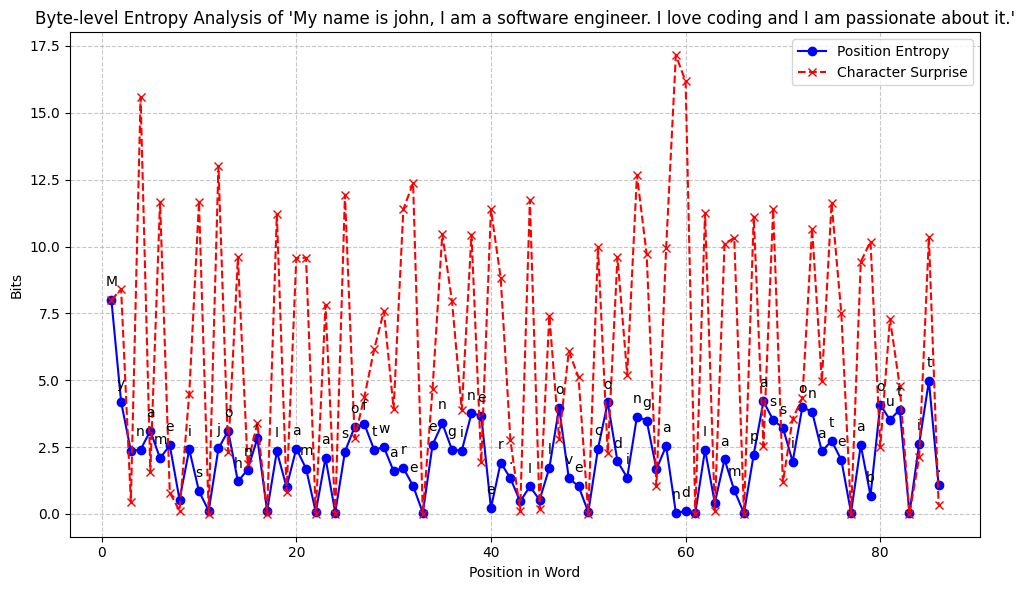

Text entropy: 529.7585605999465 bits


In [3]:
from probs.analysis import autoregressive_byte_analysis
from probs.gpt2 import next_distribution

from math import log2

results = autoregressive_byte_analysis(next_distribution,text)

total_log_probs = sum([log2(x["probability"]) for x in results])
entropy = -total_log_probs

print(f"Text entropy: {entropy} bits")



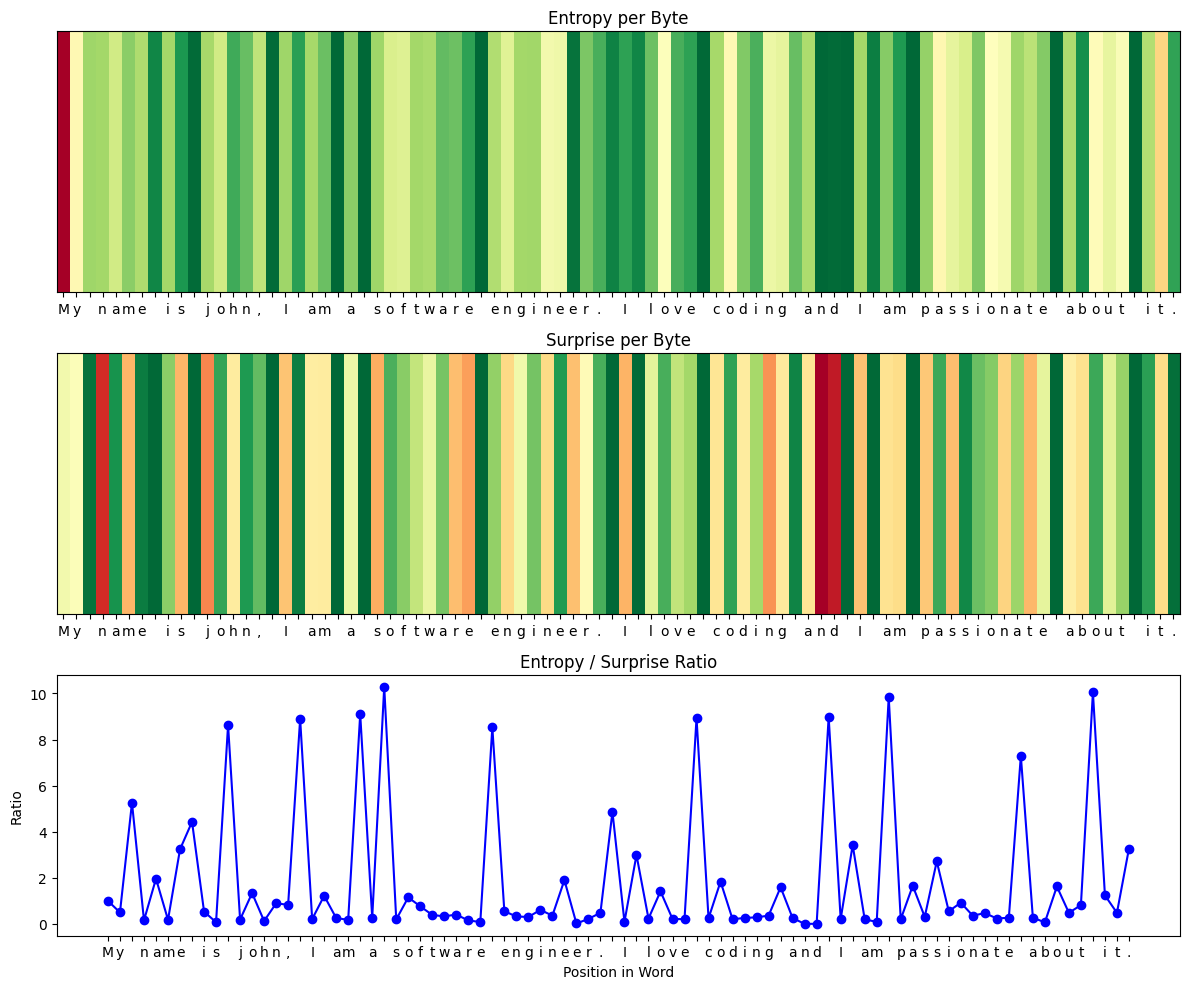

In [4]:
from probs.analysis import sentence_information_visualization

sentence_information_visualization(text,results)